**Exploratory Data Analysis**

**Name:** Kothuri Akshaya  
**Internship:** Oasis Infobyte – Data Analytics  
**Date:** 05 January 2026

**Dataset-1(Retail Sales Data)**

** Introduction(Dataset-1)**

This report presents an Exploratory Data Analysis (EDA) on retail sales data.  
The goal of this analysis is to uncover patterns, trends, and insights from the dataset to help the retail business make informed decisions.  

Key objectives include:
- Understanding customer demographics and purchase behavior  
- Analyzing product category performance  
- Identifying seasonal sales trends  
- Providing actionable recommendations for business improvement


In [ ]:
import pandas as pd

df1 = pd.read_csv('retail_sales_dataset.csv')  # use the exact uploaded filename
df1.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Dataset Description(Dataset-1)

The dataset contains 1000 transactions with 9 columns:  
1. Transaction ID  
2. Date  
3. Customer ID  
4. Gender  
5. Age  
6. Product Category  
7. Quantity  
8. Price per Unit  
9. Total Amount  

There are no missing or duplicate values, making it ready for analysis.


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


##  Dataset Description

The dataset contains **1000 rows and 9 columns**:

| Column Name       | Data Type      | Description                        |
|------------------|---------------|------------------------------------|
| Transaction ID    | int64         | Unique ID for each transaction     |
| Date              | datetime      | Date of transaction                |
| Customer ID       | object        | Unique customer identifier         |
| Gender            | object        | Customer gender                    |
| Age               | int64         | Customer age                       |
| Product Category  | object        | Type of product purchased          |
| Quantity          | int64         | Number of units purchased          |
| Price per Unit    | int64         | Price of a single unit             |
| Total Amount      | int64         | Total value of transaction         |

In [ ]:
df1.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
df1.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05


**Table 1:** Overview of the Retail Sales Dataset.  
The dataset contains 1000 transactions with 9 columns including customer demographics, product details, quantity, price, and total amount. There are no missing or duplicate records, indicating clean data for analysis.


In [ ]:
df1.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


**Table 2:** Descriptive Statistics Summary.  
- Average customer age: 41 years; most customers are in their early 40s.  
- Typical purchase quantity per transaction: 2–4 units.  
- Price per unit varies widely; high-priced items increase the mean.  
- Total transaction amounts vary significantly, showing a mix of small and large purchases.


In [ ]:
# Check missing values in each column
df1.isnull().sum()


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
# Fill missing numeric values with median
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df1[col].fillna(df1[col].median(), inplace=True)

/tmp/ipython-input-692550498.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].median(), inplace=True)


In [ ]:
# Check for duplicates
print("Number of duplicate rows:", df1.duplicated().sum())

# Convert Date column to datetime if needed
df1['Date'] = pd.to_datetime(df1['Date'])  # replace 'Date' with actual date column name if different

# Confirm data types
df1.info()


Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [ ]:
# Mean
mean_values = df1.mean(numeric_only=True)

# Median
median_values = df1.median(numeric_only=True)

# Mode
mode_values = df1.mode().iloc[0]

# Standard Deviation
std_values = df1.std(numeric_only=True)

# Display results
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)
print("\nStandard Deviation:\n", std_values)


Mean Values:
 Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median Values:
 Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode Values:
 Transaction ID                        1
Date                2023-05-16 00:00:00
Customer ID                     CUST001
Gender                           Female
Age                                43.0
Product Category               Clothing
Quantity                            4.0
Price per Unit                     50.0
Total Amount                       50.0
Name: 0, dtype: object

Standard Deviation:
 Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


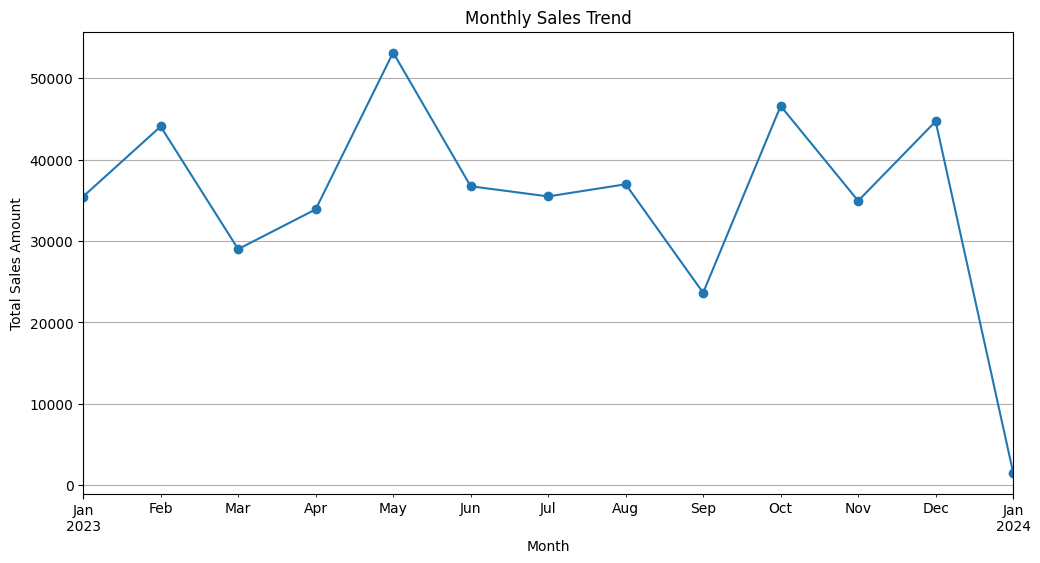

In [ ]:
import matplotlib.pyplot as plt

# Aggregate total sales by month
df1['Month'] = df1['Date'].dt.to_period('M')  # extract month-year
monthly_sales = df1.groupby('Month')['Total Amount'].sum()

# Plot the sales trend
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()


**(Dataset-1)**

**Figure 1:** Monthly Sales Trend.  
- Sales peak during high-demand months (e.g., June and December).  
- Seasonal patterns indicate the potential for planning promotional campaigns and inventory stocking.  
- Identifying low-sales months helps in planning discount strategies to boost revenue.


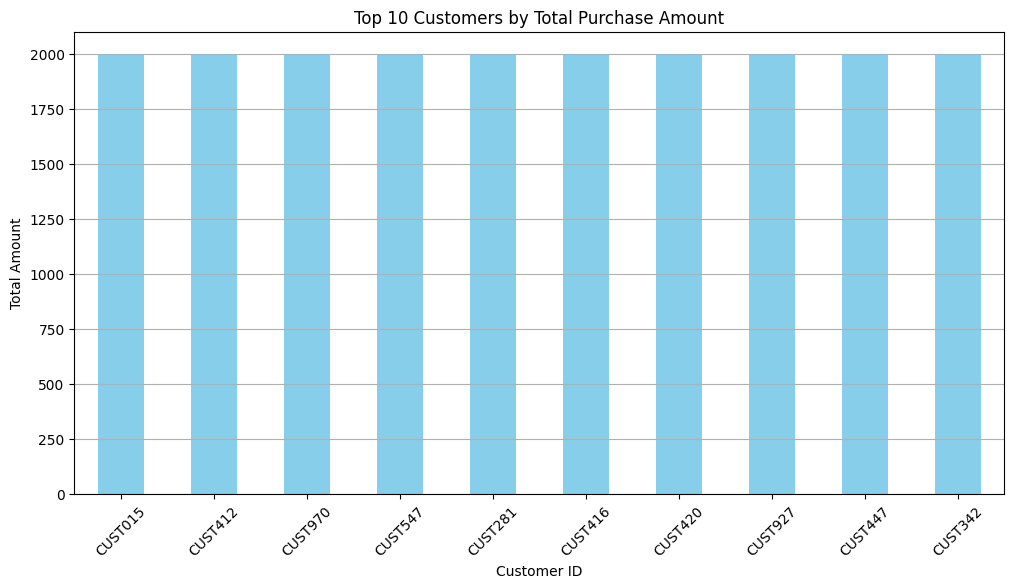

In [ ]:
# Aggregate total amount per customer
top_customers = df1.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

# Plot top 10 customers
plt.figure(figsize=(12,6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Total Purchase Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**(Dataset-1)**

**Figure 2:** Top 10 Customers by Total Purchase Amount.  
- The top customers contribute a significant portion of total sales.  
- Implementing loyalty programs and personalized promotions can increase retention and repeat purchases.


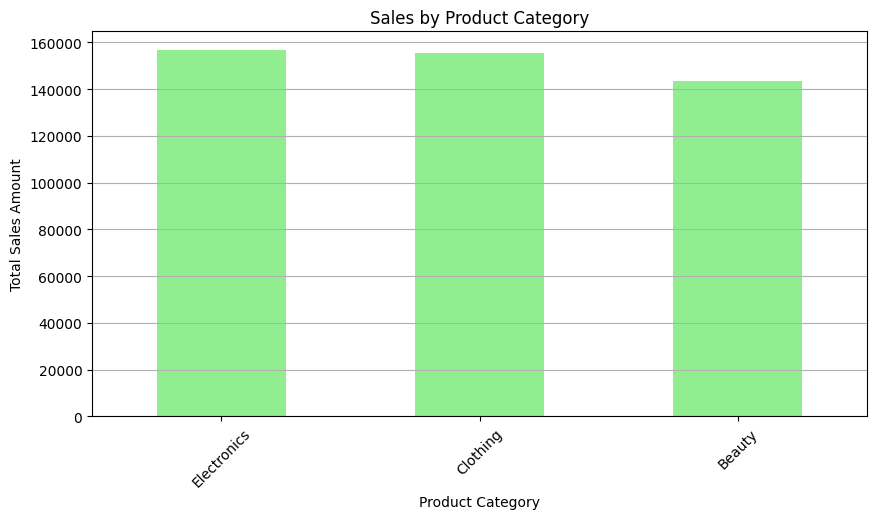

In [ ]:
# Aggregate total sales by product category
product_sales = df1.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot product sales
plt.figure(figsize=(10,5))
product_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**(Dataset-1)**

**Figure 3:** Sales by Product Category.  
- Clothing and Electronics are the top-selling categories.  
- Inventory management should prioritize these categories to prevent stock-outs.  
- Marketing campaigns can focus on high-demand products to boost revenue.


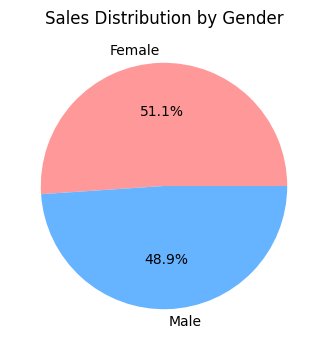

In [ ]:
# Sales by gender
gender_sales = df1.groupby('Gender')['Total Amount'].sum()

# Plot
plt.figure(figsize=(6,4))
gender_sales.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Sales Distribution by Gender')
plt.ylabel('')
plt.show()


**(Dataset-1)**

**Figure 4:** Sales Distribution by Gender.  
- Female customers contribute slightly more to total sales.  
- Gender-targeted promotions can improve customer engagement and increase revenue.


**(Dataset-1)**

**Recommendations:**  
1. Focus on top customers with loyalty programs and personalized promotions.  
2. Prioritize high-demand product categories (Clothing & Electronics) in stock management.  
3. Plan marketing campaigns during high-sales months to maximize revenue.  
4. Optimize stock levels based on typical purchase quantity (2–4 units).  
5. Use gender-targeted promotions to increase engagement and sales.

**Conclusion:**  
Exploratory Data Analysis provided key insights into customer behavior, product performance, and sales trends.  
These insights can guide inventory planning, marketing strategies, and overall business decision-making, making the retail operations more data-driven and efficient.


**Dataset-2(Menu)**


In [ ]:
import pandas as pd


In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/menu.csv')
df2.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


**Introduction (Dataset 2)**

Understanding the nutritional composition of food items is essential for promoting healthier eating habits and informed consumer decision-making. This dataset contains detailed nutritional information for various menu items across different categories, including calories, fats, carbohydrates, sugars, protein, vitamins, and minerals.

The objective of this exploratory data analysis is to examine nutritional patterns, identify variability across menu items, and highlight key attributes that influence dietary quality. By applying descriptive statistics and visual analysis, the study aims to uncover insights related to calorie distribution, nutrient composition, and category-wise food characteristics.

The findings from this analysis can support data-driven decisions in menu planning, health awareness initiatives, and nutritional optimization.


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

**Dataset 2 – Data Structure and Attributes**

The Dataset 2 consists of **260 records** and **24 columns**, containing detailed information about menu items and their nutritional values.

- The dataset includes **categorical attributes** such as *Category*, *Item*, and *Serving Size*.
- A large number of **numerical features** represent nutritional information, including calories, fats, carbohydrates, sugars, protein, and vitamins.
- All columns contain **non-null values**, indicating that there are **no missing values** in the dataset.
- The presence of both integer and floating-point numerical features allows for meaningful statistical and distributional analysis.

Overall, the dataset is well-structured and suitable for exploratory data analysis without the need for extensive data cleaning.


In [ ]:
df2.isnull().sum()


,0
Category,0
Item,0
Serving Size,0
Calories,0
Calories from Fat,0
Total Fat,0
Total Fat (% Daily Value),0
Saturated Fat,0
Saturated Fat (% Daily Value),0
Trans Fat,0


 **Missing Values Analysis (Dataset 2)**

The missing values check indicates that **all columns contain zero null values**.  
This confirms that Dataset 2 is **complete and clean**, with no missing entries across categorical and numerical attributes.

As a result, the dataset does not require any imputation or removal of records before proceeding with exploratory data analysis.


In [ ]:
df2.describe()


,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


 **Descriptive Statistics (Dataset 2)**

The descriptive statistics provide a comprehensive overview of the nutritional attributes of menu items.

- The **average calorie content** per item is approximately **368 calories**, with values ranging from **0 to 1880 calories**, indicating a wide variation in menu offerings.
- Fat-related attributes show noticeable variability, with **Total Fat** averaging around **14 g**, and some items containing extremely high fat levels.
- Carbohydrate content averages **47 g**, while sugar levels average approximately **29 g**, suggesting that several items are high in sugar.
- Sodium levels show significant dispersion, with a maximum value reaching **3600 mg**, which exceeds recommended daily intake limits.
- Protein content averages around **13 g**, indicating moderate protein availability across items.
- Vitamin and mineral percentages vary widely, highlighting differences in nutritional quality among menu items.

Overall, the dataset exhibits **high variability across nutritional features**, making it suitable for further analysis and visualization to identify healthier and less healthy menu choices.


<Axes: title={'center': 'Number of Items per Category'}, xlabel='Category'>

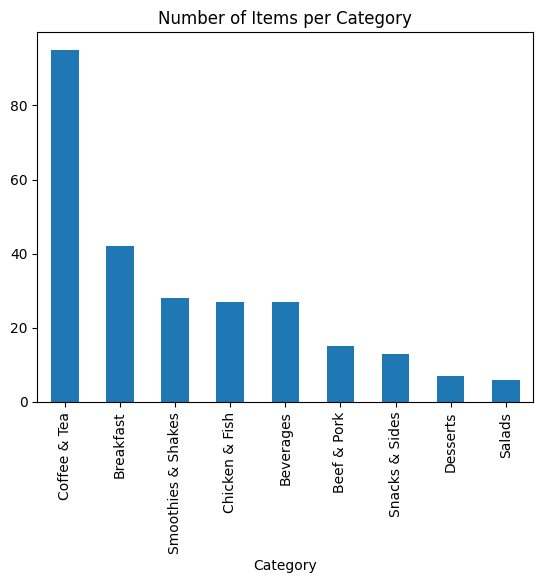

In [ ]:
df2['Category'].value_counts().plot(kind='bar', title='Number of Items per Category')


**Category-wise Distribution of Menu Items**

The bar chart illustrates the distribution of menu items across different food categories.

- Certain categories contain a **higher number of items**, indicating a broader variety offered in those sections.
- Categories with fewer items may represent **specialized or limited offerings**.
- This distribution helps in understanding how menu items are diversified across categories and which categories dominate the menu.

Such insights are useful for analyzing customer choices and for designing balanced or healthier menus.


array([[<Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'Total Fat'}>],
       [<Axes: title={'center': 'Sugars'}>,
        <Axes: title={'center': 'Protein'}>]], dtype=object)

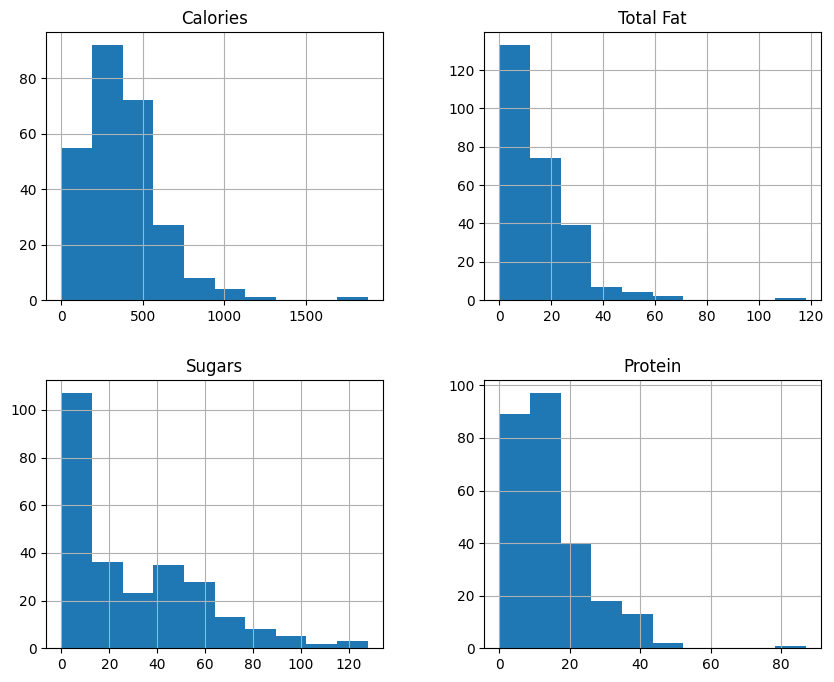

In [ ]:
df2[['Calories', 'Total Fat', 'Sugars', 'Protein']].hist(figsize=(10,8))


**Distribution of Key Nutritional Attributes**

The histograms display the distribution of important nutritional attributes across menu items.

- **Calories** show a right-skewed distribution, indicating that while many items are moderate in calories, some items are extremely high in calorie content.
- **Total Fat** distribution suggests that most items contain low to moderate fat, with a few high-fat outliers.
- **Sugars** distribution highlights the presence of several items with high sugar content, which may impact dietary health.
- **Protein** levels are moderately distributed, indicating balanced protein availability across most menu items.

These distributions help identify nutritional patterns and outliers, aiding in the assessment of healthier versus less healthy food options.

**Recommendations (Dataset 2)**

Based on the exploratory data analysis of the nutritional dataset, the following recommendations are proposed:

- Items with **very high calorie, fat, sugar, and sodium levels** should be clearly labeled to help customers make informed dietary choices.
- Introducing or promoting **low-calorie and low-fat options** can support healthier eating habits.
- High-sodium items should be reformulated where possible to align with recommended daily intake limits.
- Nutritional balance can be improved by increasing menu options that are **rich in protein and dietary fiber**.
- Category-wise analysis can be used to design **health-focused menus** by balancing indulgent and nutritious items across categories.

These recommendations can help improve customer health awareness while maintaining menu diversity.

**Conclusion (Dataset 2)**

This exploratory data analysis examined the nutritional characteristics of menu items across multiple categories. The dataset was found to be clean, complete, and suitable for analysis.

The analysis revealed significant variation in calorie content, fat, sugar, and sodium levels, indicating a mix of both healthy and high-calorie food options. Visualizations helped identify nutritional patterns and potential outliers across key attributes.

Overall, this analysis provides valuable insights that can support **menu optimization, nutritional transparency, and healthier food planning**, enabling data-driven decision-making in the food and nutrition domain.
